# Predict boston house price

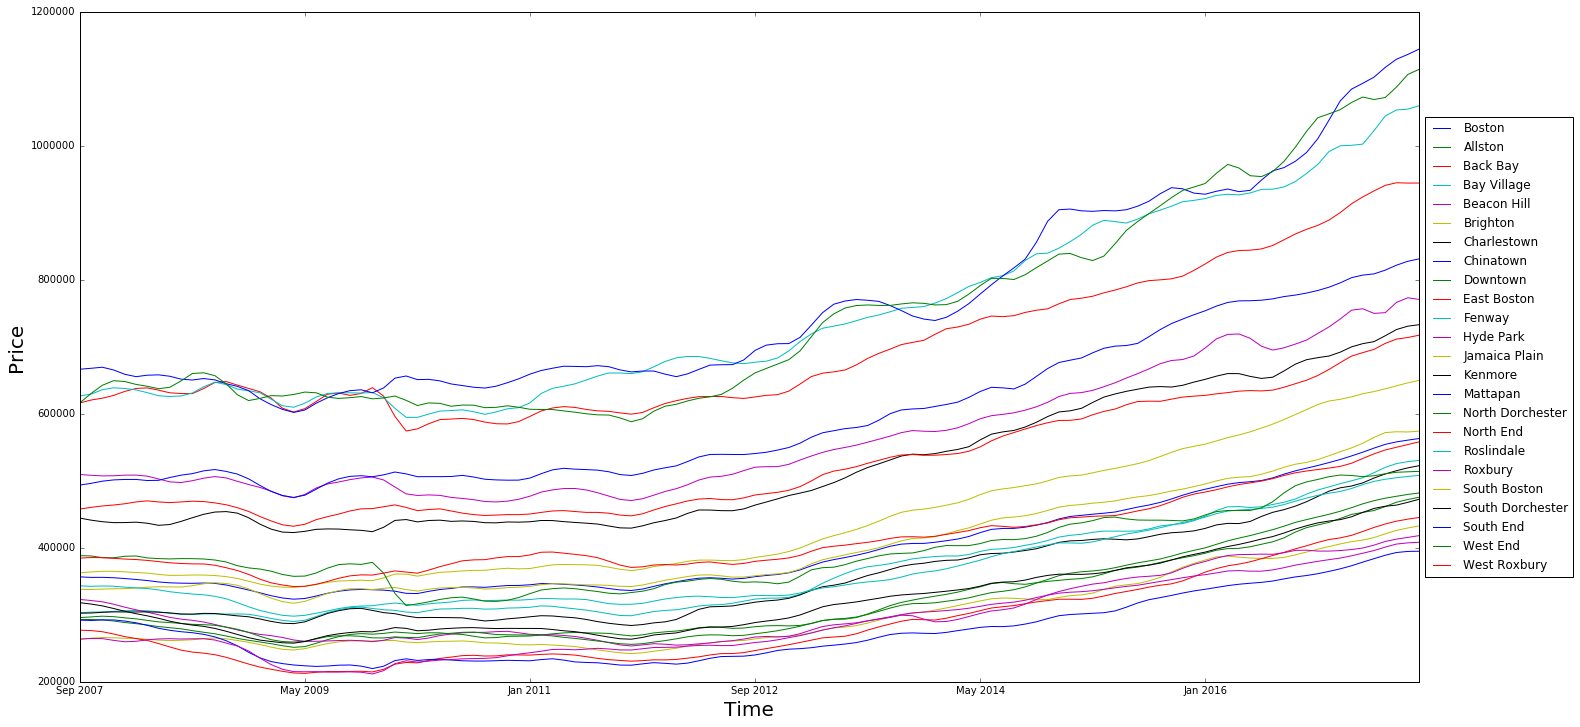

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('boston-ma.csv', skiprows=1)
df = df.drop(['Region Type', 'Data Type'], axis=1).set_index('Region Name').dropna(how='all').T
df = df.apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)# change the object type to float

fig = plt.figure()
plt.rcParams["figure.figsize"] = (24, 12)
df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.rc('legend',fontsize=40) # using a size in points
plt.rc('legend',fontsize='xx-large') # using a named size
plt.show()

# Prediction

C:\Users\yanra\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


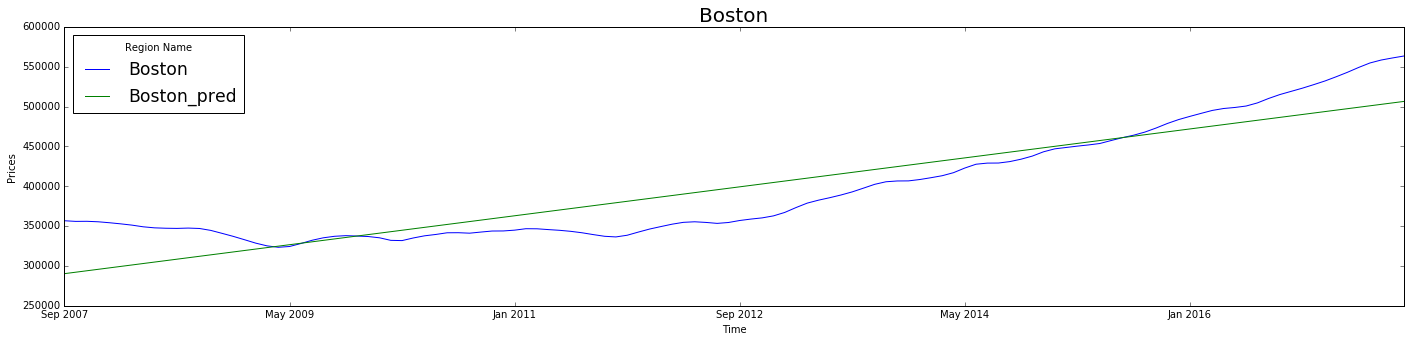

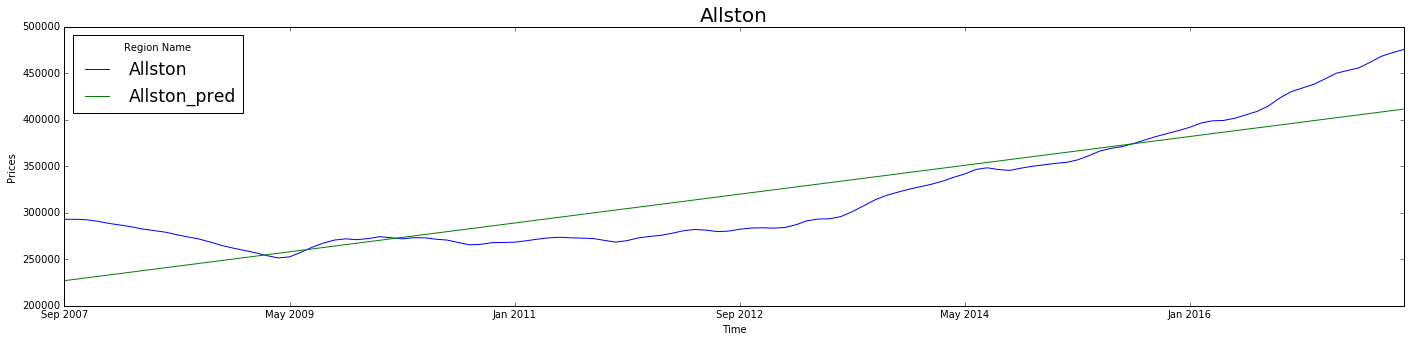

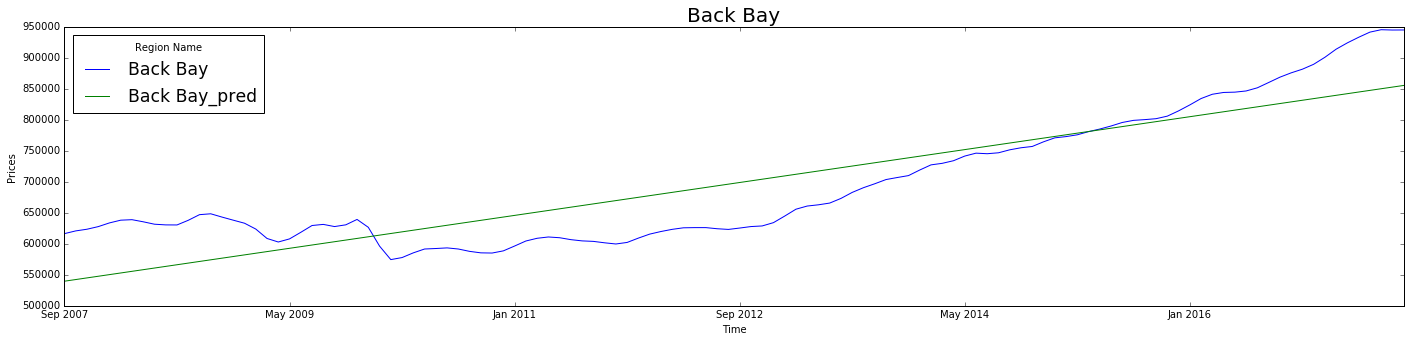

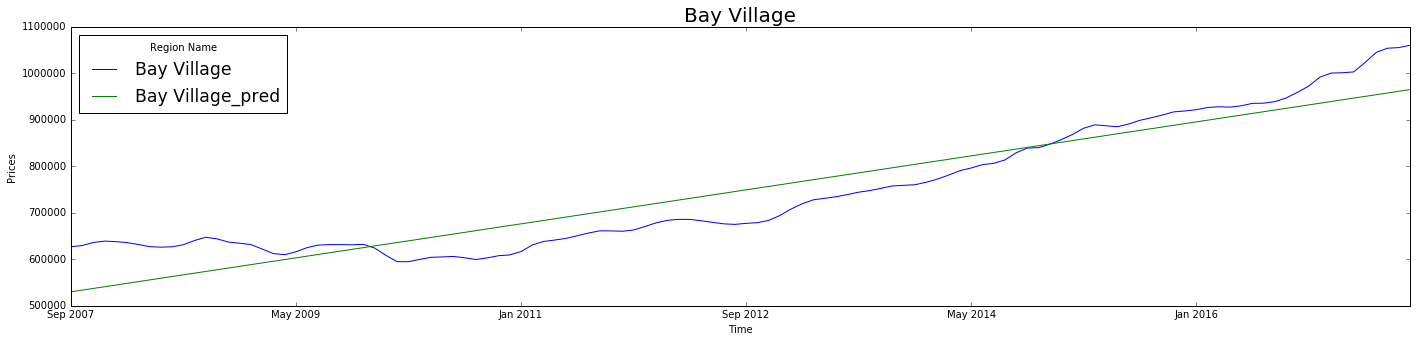

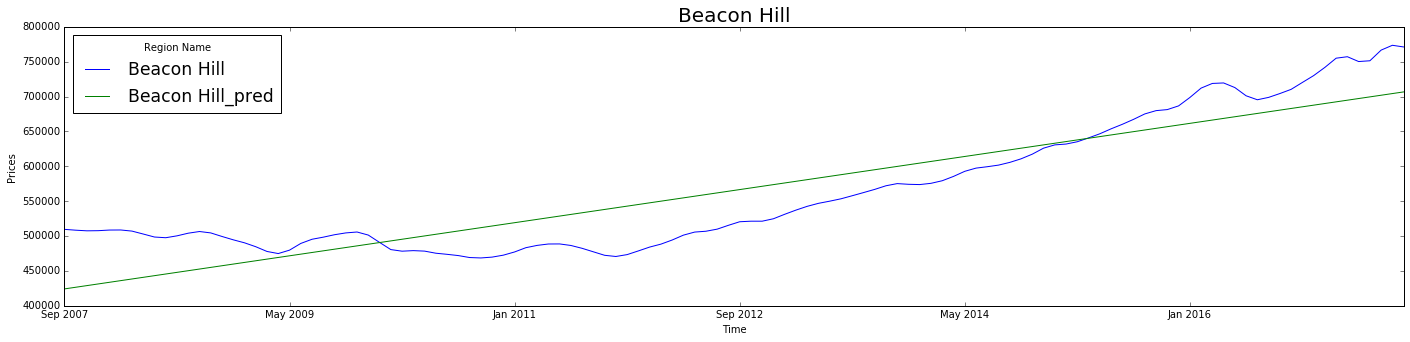

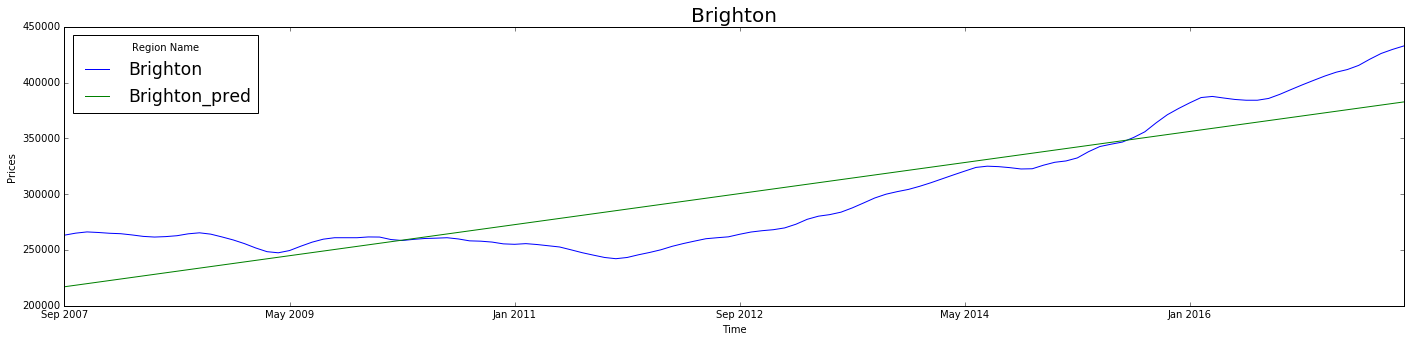

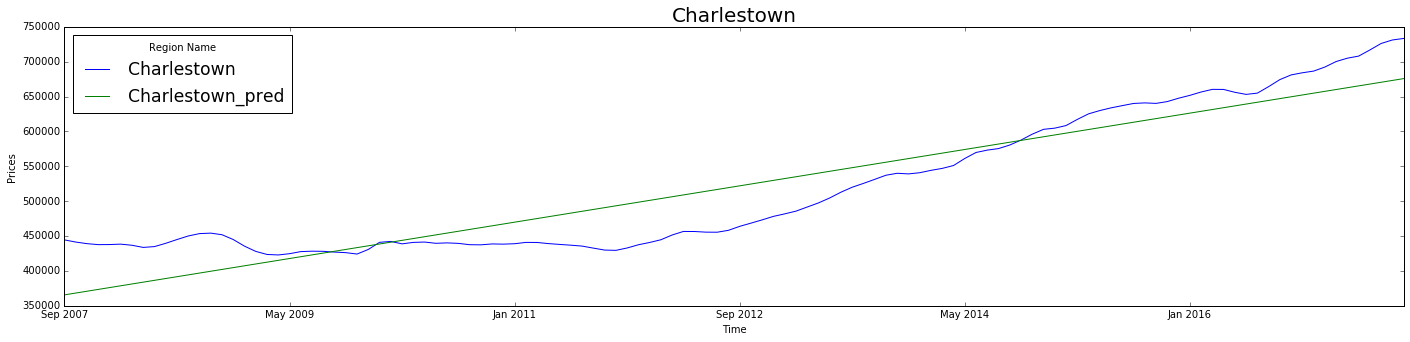

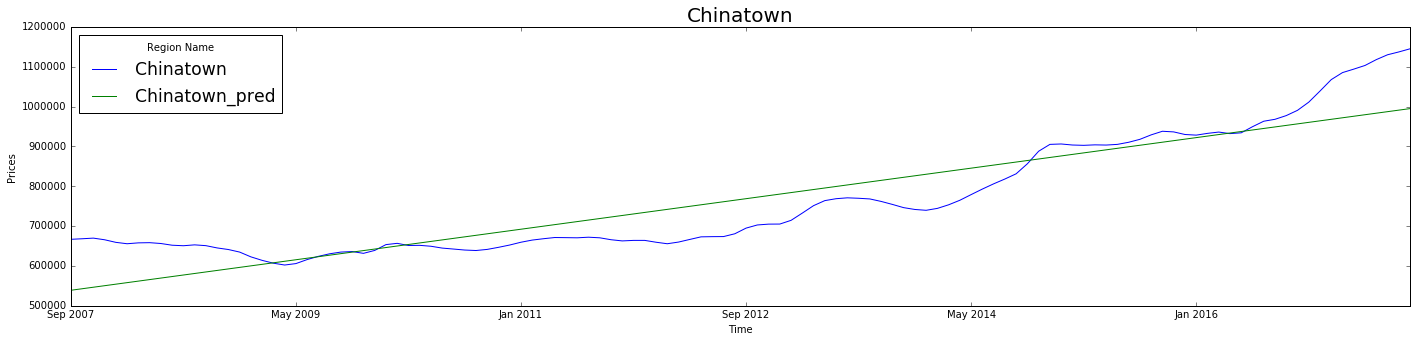

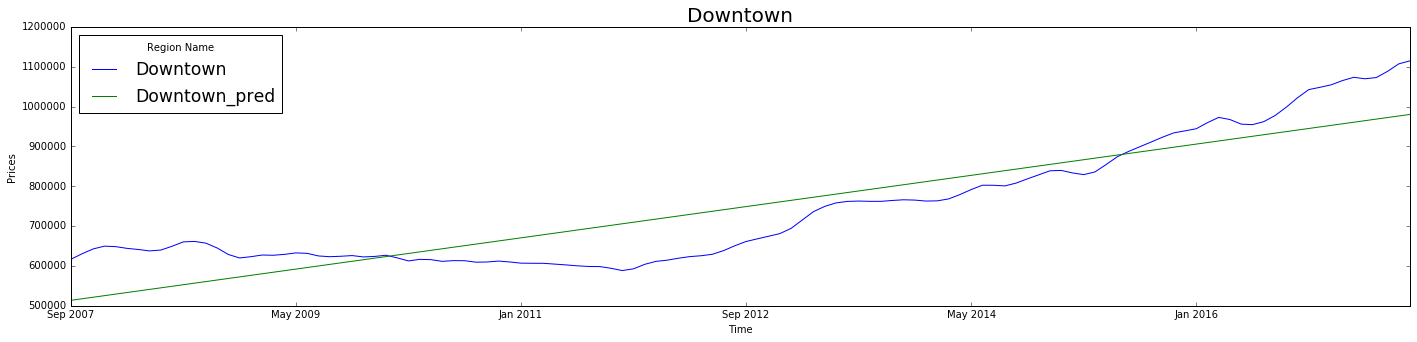

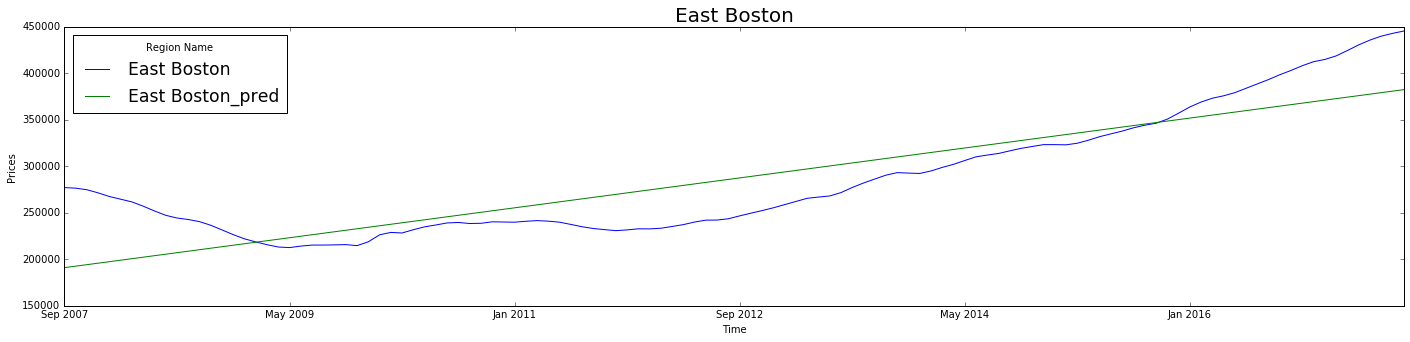

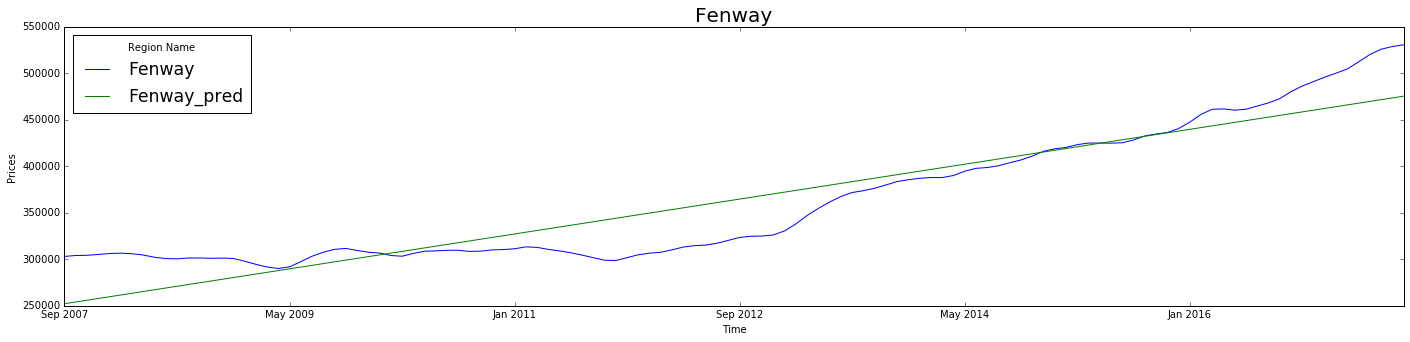

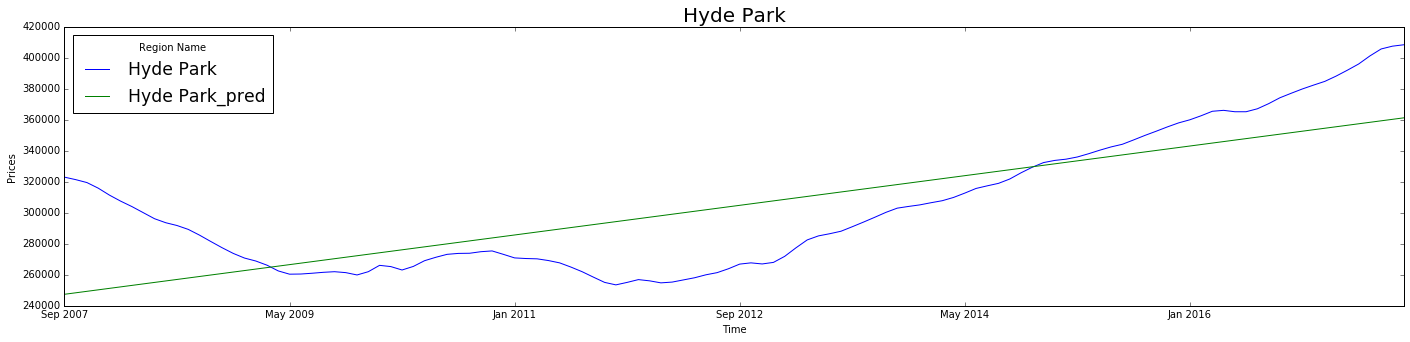

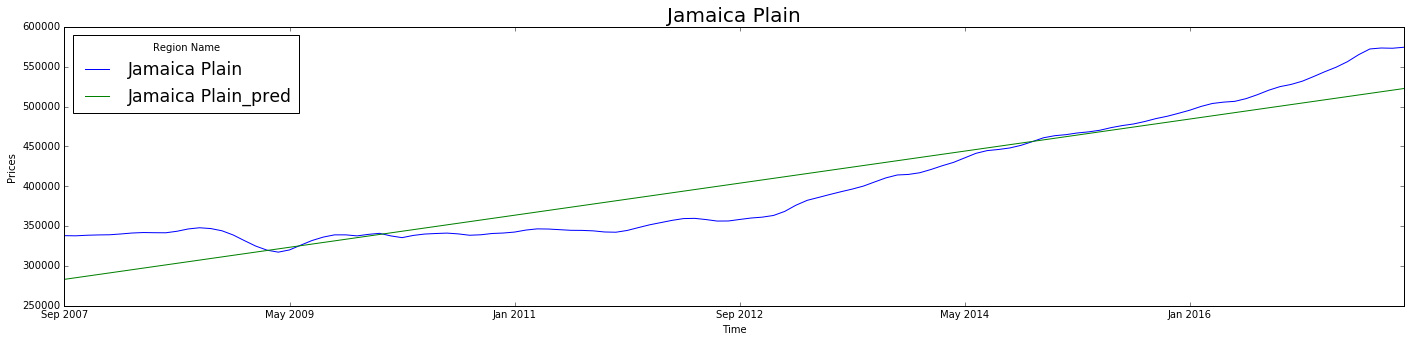

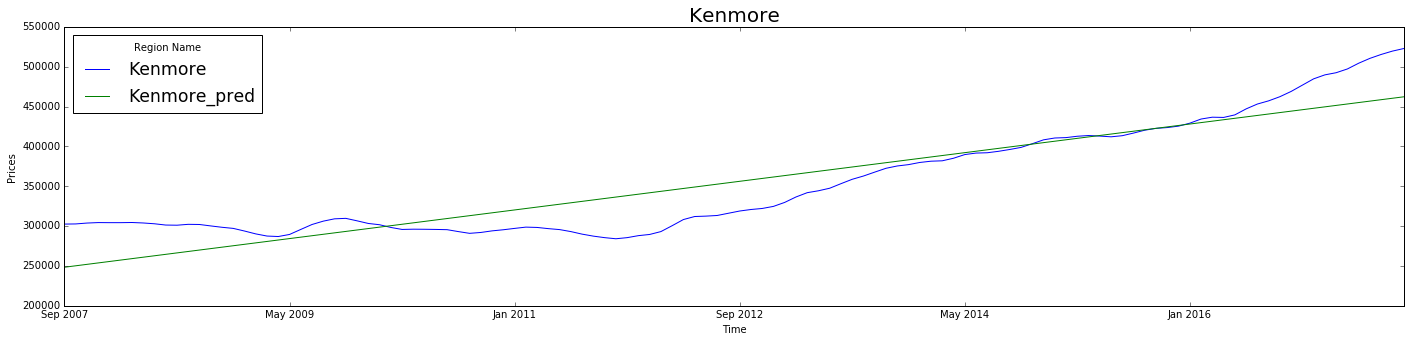

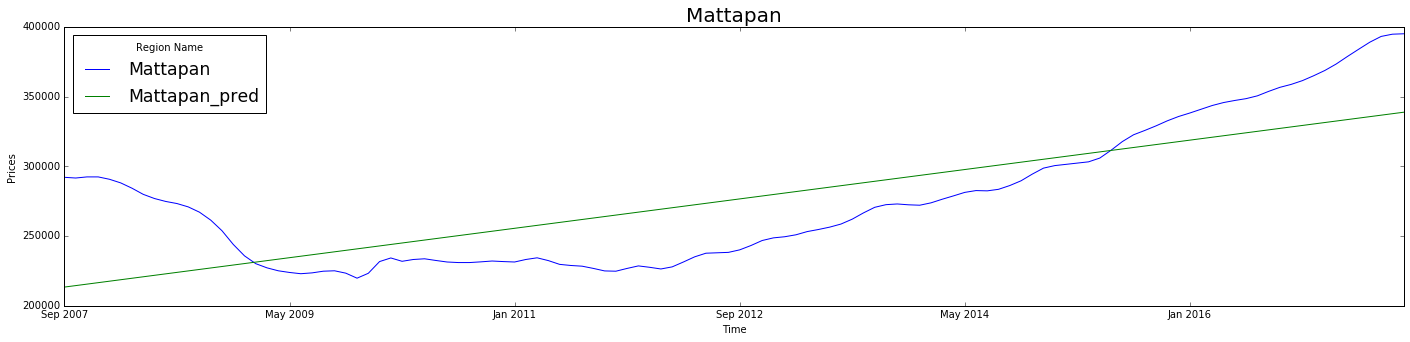

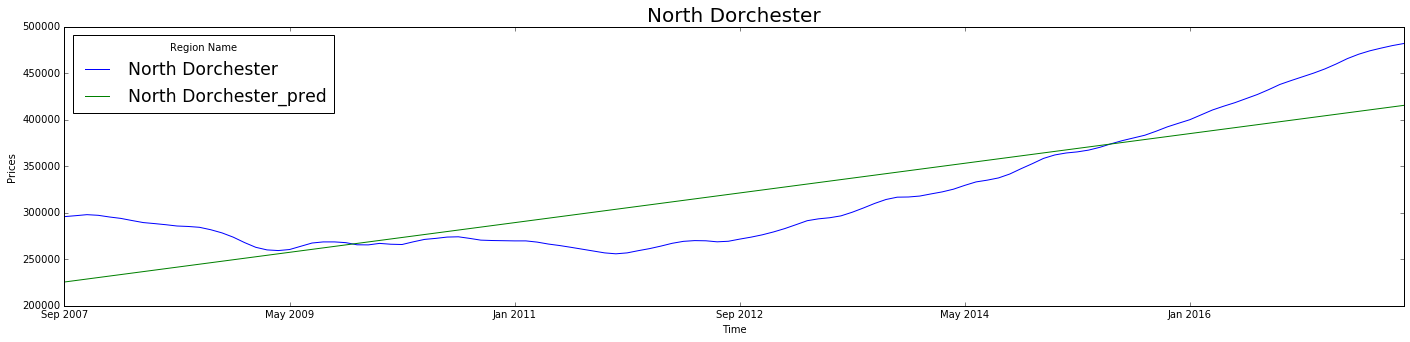

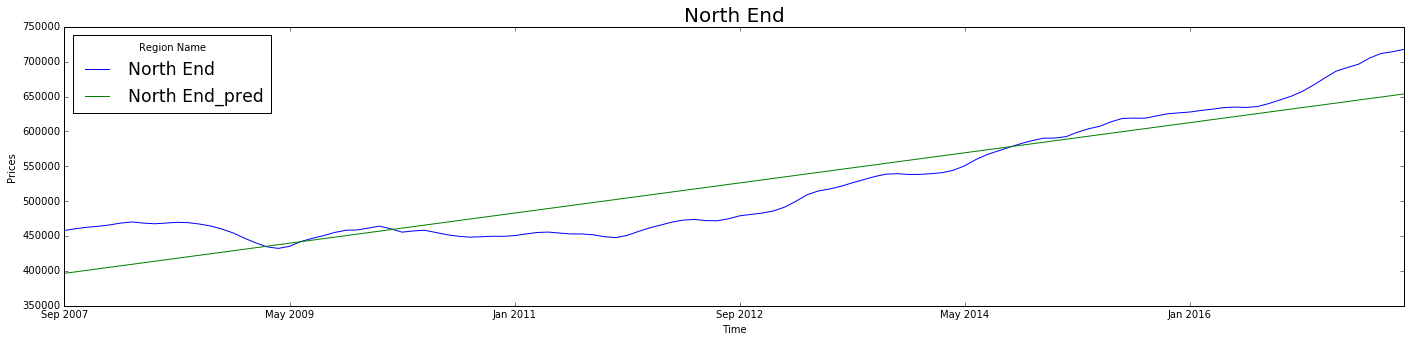

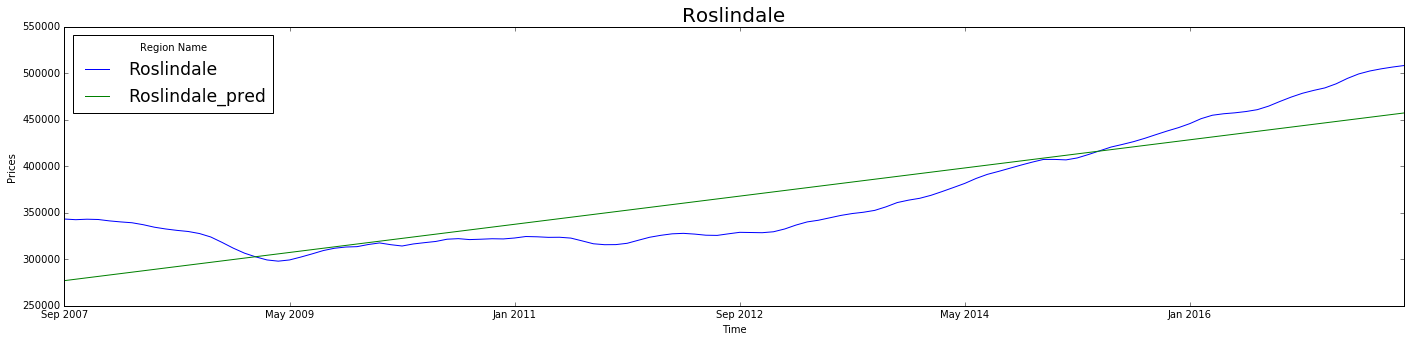

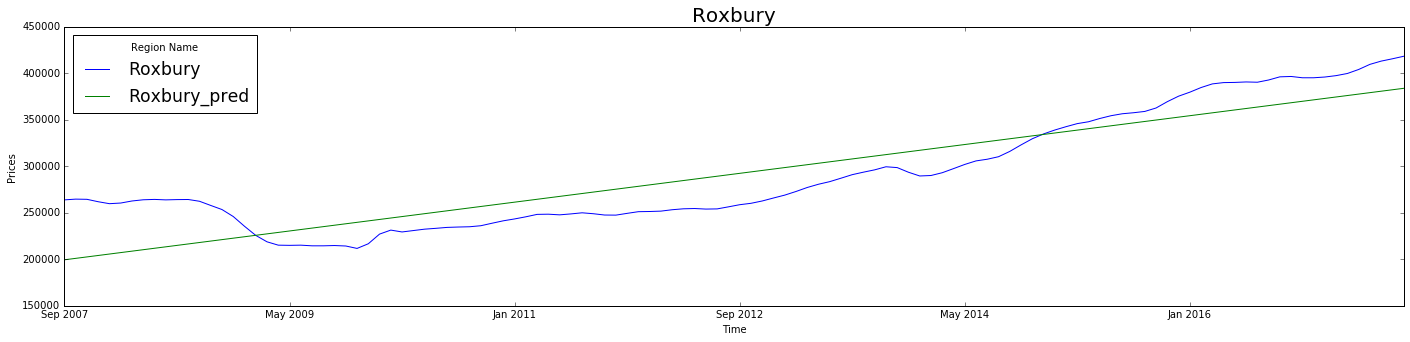

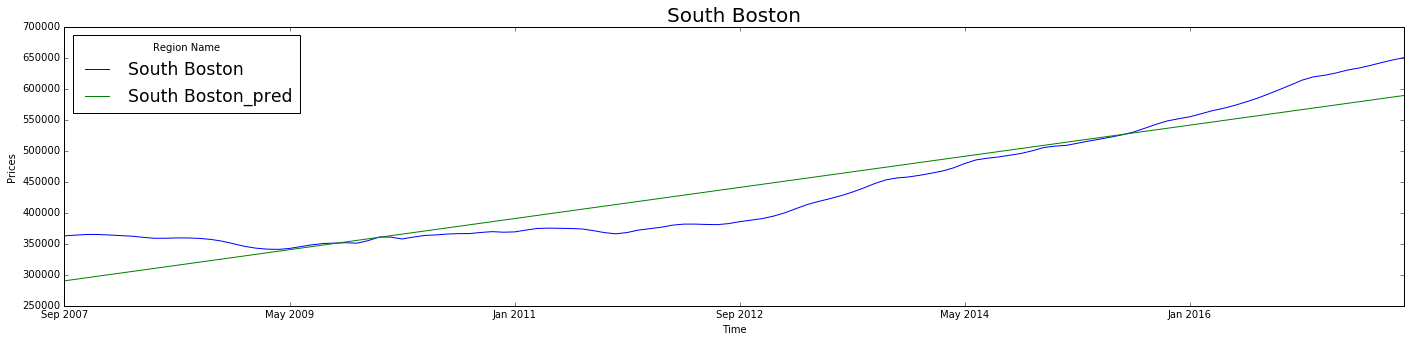

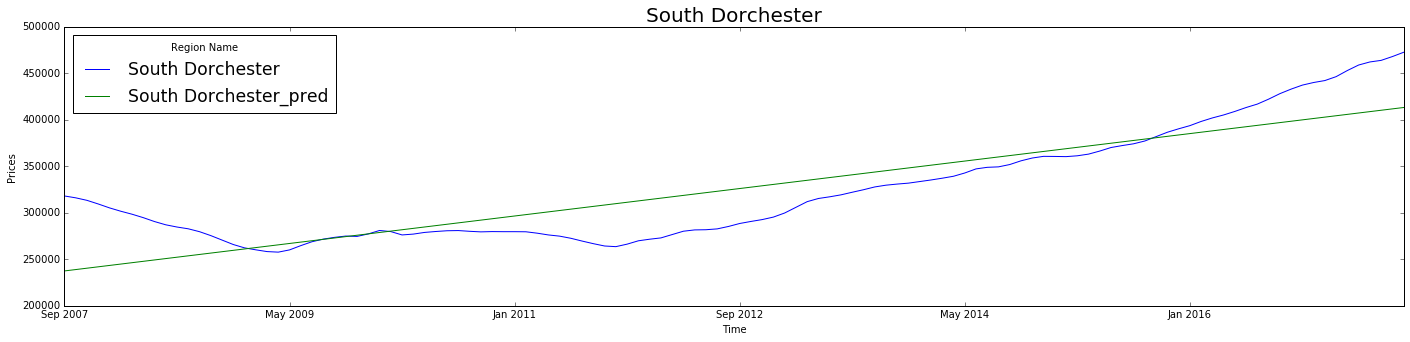

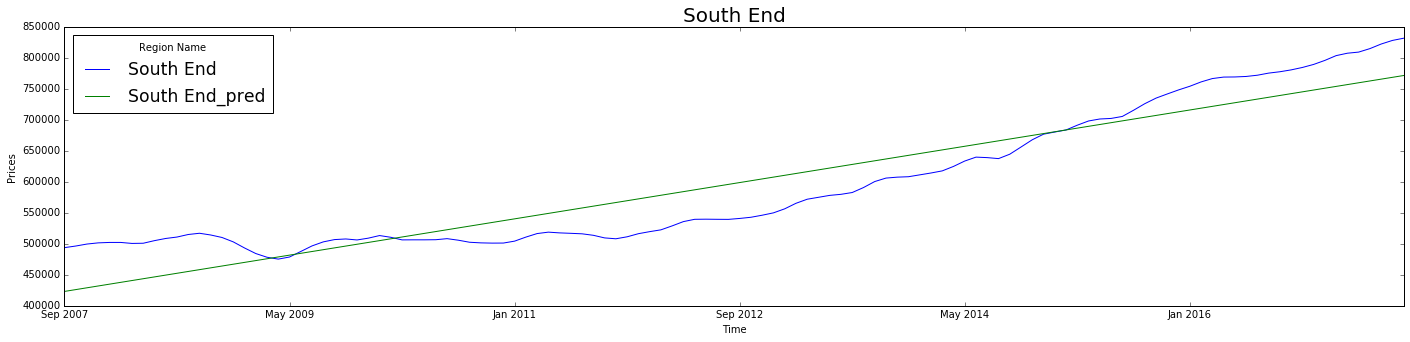

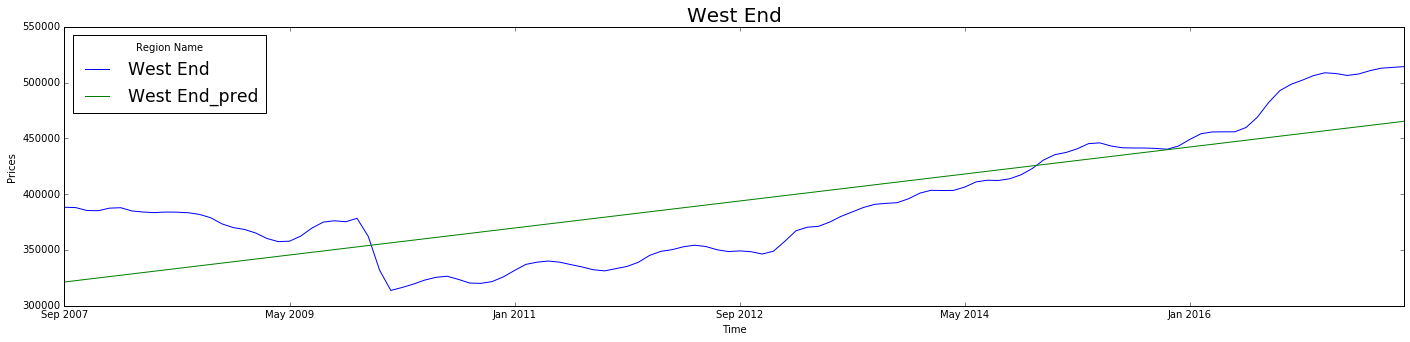

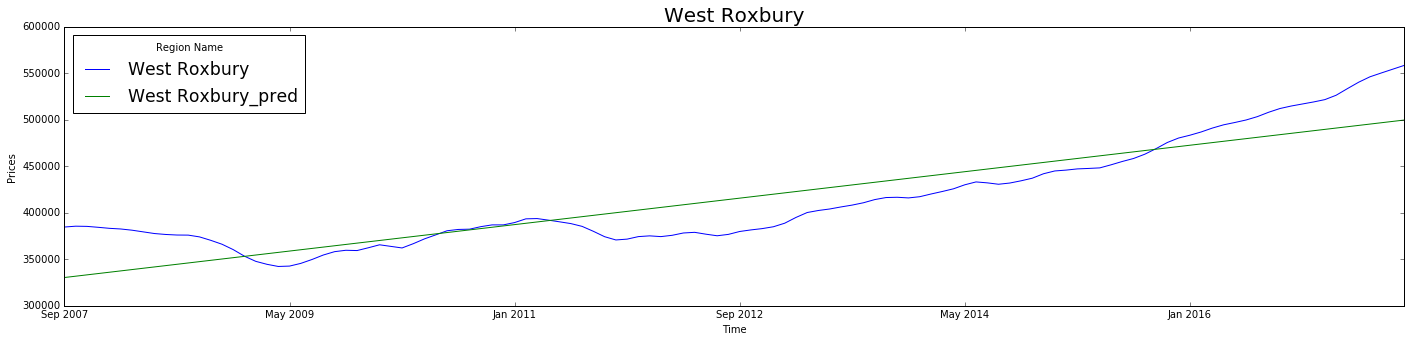

In [2]:
import statsmodels.api as sm
num_fig = df.shape[1]
plt.figure()

X = range(df.shape[0])
X = sm.add_constant(X)

for ii in range(num_fig):    
    plt.rcParams["figure.figsize"] = (24, 5)
    col = df.columns[ii]
    new_col = df.columns[ii] + '_pred'
    Y = df[col]

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)

    df[new_col] = predictions
    df[[col, new_col]].plot()

    plt.xlabel('Time')
    plt.ylabel('Prices')
    plt.title(col, fontsize=20)

plt.show()

In [3]:
df.head() # prediction is in the back

Region Name,Boston,Allston,Back Bay,Bay Village,Beacon Hill,Brighton,Charlestown,Chinatown,Downtown,East Boston,...,Mattapan_pred,North Dorchester_pred,North End_pred,Roslindale_pred,Roxbury_pred,South Boston_pred,South Dorchester_pred,South End_pred,West End_pred,West Roxbury_pred
Sep 2007,356700,293000,616400,627000,509600,263300,444500,666800,616600,277100,...,213428.168044,225592.617080,396550.096419,277067.603306,199468.002755,290274.269972,237487.190083,423190.977961,321333.415978,330419.793388
Oct 2007,355900,293000,620800,629600,508400,265100,441400,668200,630600,276500,...,214481.364099,227188.399426,398710.584994,278582.097368,201017.378059,292785.486724,238963.959997,426117.320069,322543.162488,331841.981735
Nov 2007,356000,292500,623500,636200,507500,266200,439100,669800,642800,274800,...,215534.560155,228784.181772,400871.073570,280096.591430,202566.753363,295296.703475,240440.729912,429043.662176,323752.908998,333264.170081
Dec 2007,355400,290800,627700,639100,507700,265700,437700,665700,649700,271400,...,216587.756210,230379.964118,403031.562146,281611.085492,204116.128666,297807.920226,241917.499826,431970.004283,324962.655508,334686.358428
Jan 2008,354200,288500,633700,638000,508600,265000,437800,659200,648400,267500,...,217640.952265,231975.746464,405192.050721,283125.579554,205665.503970,300319.136977,243394.269741,434896.346390,326172.402019,336108.546774


In [4]:
df.shape

(120, 48)